In [ ]:
from google.colab import files
uploaded=files.upload()

Saving World-happiness-report-2024.csv to World-happiness-report-2024.csv


Part 1 – Basic Data Understanding (Pandas)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('World-happiness-report-2024.csv')
df.head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
df.shape

(143, 12)

In [ ]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [ ]:
df.dtypes

,0
Country name,object
Regional indicator,object
Ladder score,float64
upperwhisker,float64
lowerwhisker,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64


In [ ]:
df.isnull().sum()

,0
Country name,0
Regional indicator,0
Ladder score,0
upperwhisker,0
lowerwhisker,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [ ]:
df[df.isnull().any(axis=1)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,Commonwealth of Independent States,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,Middle East and North Africa,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.fillna(df.mean(numeric_only=True))

In [ ]:
df[df.isnull().any(axis=1)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual


In [ ]:
df['Country name'].unique().size

143

In [ ]:
df['Regional indicator'].unique().size

10

In [ ]:
max_value = df["Ladder score"].max()
df[df["Ladder score"] == max_value]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [ ]:
df['Regional indicator'].value_counts()

,count
Regional indicator,
Sub-Saharan Africa,35
Western Europe,20
Latin America and Caribbean,19
Middle East and North Africa,17
Central and Eastern Europe,17
Commonwealth of Independent States,10
Southeast Asia,9
East Asia,6
South Asia,6


Part 2 – EDA (Exploratory Data Analysis)


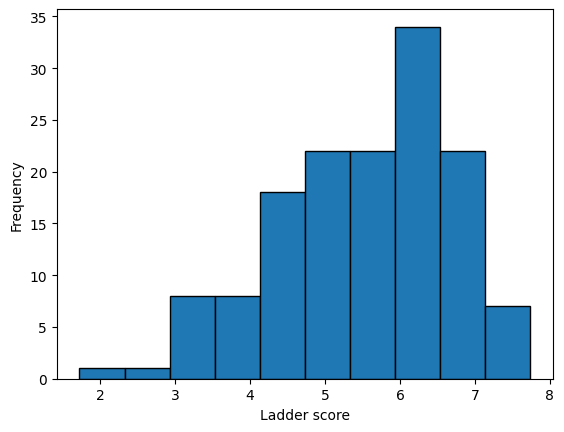

In [ ]:
x=df['Ladder score']
plt.hist(x,edgecolor='black')
plt.xlabel('Ladder score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
a=df.sort_values(by="Ladder score",ascending=False)
a['Country name'].head(10)

,Country name
0,Finland
1,Denmark
2,Iceland
3,Sweden
4,Israel
5,Netherlands
6,Norway
7,Luxembourg
8,Switzerland
9,Australia


In [ ]:
a['Country name'].tail(10)

,Country name
133,Zambia
134,Eswatini
135,Malawi
136,Botswana
137,Zimbabwe
138,Congo (Kinshasa)
139,Sierra Leone
140,Lesotho
141,Lebanon
142,Afghanistan


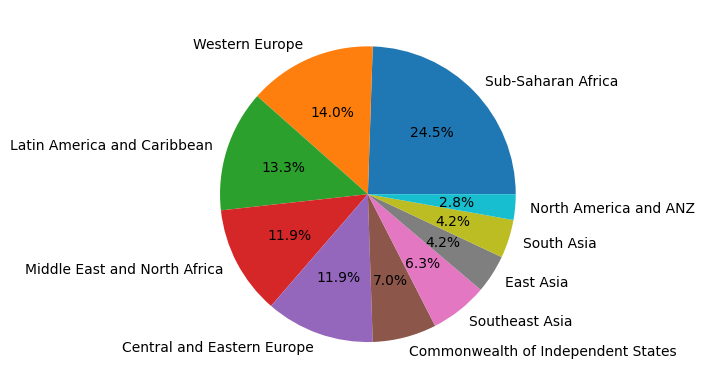

In [ ]:
reg=df['Regional indicator']
reg.value_counts()
plt.pie(reg.value_counts(),labels=reg.value_counts().index,autopct='%1.1f%%')
plt.show()

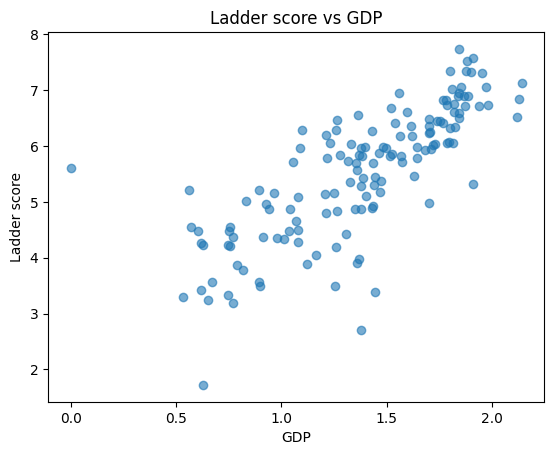

In [ ]:
x=df['Log GDP per capita']
y=df['Ladder score']
plt.scatter(x,y,alpha=0.6)
plt.xlabel('GDP')
plt.ylabel('Ladder score')
plt.title('Ladder score vs GDP')
plt.show()

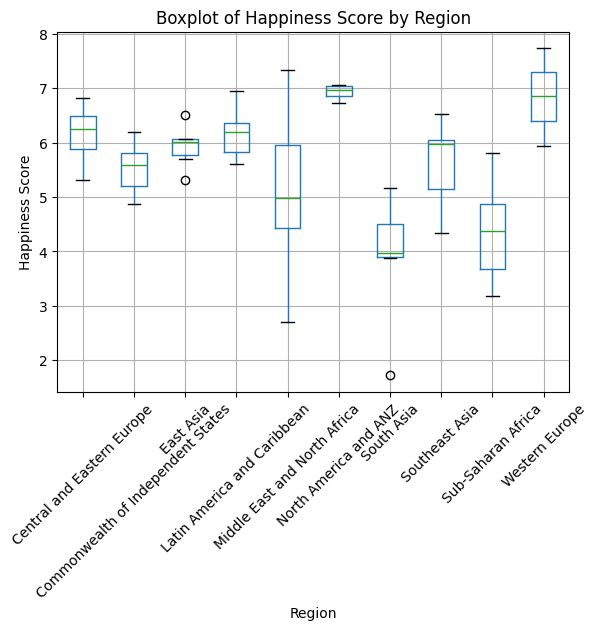

In [ ]:
df.boxplot(column="Ladder score", by="Regional indicator")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.title("Boxplot of Happiness Score by Region")
plt.xticks(rotation=45)
plt.suptitle("")
plt.show()

Part 3 – Statistics

In [ ]:
avg=df['Ladder score'].mean()
avg

np.float64(5.52758041958042)

In [ ]:
df['Ladder score'].median()

5.785

In [ ]:
df['Ladder score'].mode()

,Ladder score
0,3.502
1,5.816
2,6.188


In [ ]:
df['Ladder score'].var()

1.3705771466561611

In [ ]:
df['Ladder score'].std()

1.1707165099442995

In [ ]:
df[df['Ladder score']<avg][['Country name','Ladder score']]

,Country name,Ladder score
80,Bulgaria,5.463
81,Armenia,5.455
82,South Africa,5.422
83,North Macedonia,5.369
84,Algeria,5.364
...,...,...
138,Congo (Kinshasa),3.295
139,Sierra Leone,3.245
140,Lesotho,3.186
141,Lebanon,2.707


In [ ]:
x=df.sort_values(by='Ladder score',ascending=False).head(20)
x

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
x['Regional indicator'].unique()

array(['Western Europe', 'Middle East and North Africa',
       'North America and ANZ', 'Latin America and Caribbean',
       'Central and Eastern Europe'], dtype=object)

Part 4 – Linear Algebra & NumPy

In [ ]:
x=np.array(df['Ladder score'])
y=np.array(df['Log GDP per capita'])
z=x+y
z

array([9.585     , 9.491     , 9.406     , 9.222     , 9.144     ,
       9.22      , 9.254     , 9.263     , 9.03      , 8.911     ,
       8.839     , 8.516     , 8.796     , 8.79      , 8.74      ,
       8.762     , 8.967     , 8.605     , 8.584     , 8.571     ,
       8.529     , 8.716     , 8.664     , 8.59      , 8.199     ,
       8.207     , 8.427     , 8.436     , 7.925     , 8.641     ,
       8.345     , 8.19      , 7.734     , 8.2       , 8.18      ,
       8.187     , 7.949     , 7.976     , 8.06      , 8.173     ,
       8.124     , 7.547     , 7.381     , 7.702     , 7.963     ,
       7.934     , 7.407     , 7.75      , 7.81      , 7.862     ,
       7.846     , 7.873     , 7.28      , 7.374     , 7.758     ,
       7.739     , 7.375     , 7.46      , 7.621     , 7.47      ,
       7.059     , 7.33780714, 7.652     , 7.618     , 7.342     ,
       7.392     , 7.122     , 7.212     , 7.34      , 7.386     ,
       7.201     , 7.427     , 7.001     , 7.04      , 6.768  

In [ ]:
np.dot(x,y)

np.float64(1143.5100863357143)

In [ ]:
mat = df[['Log GDP per capita', 'Social support']].values
mat

array([[1.844     , 1.572     ],
       [1.908     , 1.52      ],
       [1.881     , 1.617     ],
       [1.878     , 1.501     ],
       [1.803     , 1.513     ],
       [1.901     , 1.462     ],
       [1.952     , 1.517     ],
       [2.141     , 1.355     ],
       [1.97      , 1.425     ],
       [1.854     , 1.461     ],
       [1.81      , 1.527     ],
       [1.561     , 1.373     ],
       [1.845     , 1.364     ],
       [1.885     , 1.336     ],
       [1.84      , 1.459     ],
       [1.868     , 1.44      ],
       [2.129     , 1.39      ],
       [1.783     , 1.511     ],
       [1.766     , 1.454     ],
       [1.822     , 1.326     ],
       [1.786     , 1.502     ],
       [1.983     , 1.164     ],
       [1.939     , 1.392     ],
       [1.871     , 1.39      ],
       [1.521     , 1.241     ],
       [1.596     , 1.431     ],
       [1.818     , 1.348     ],
       [1.842     , 1.361     ],
       [1.364     , 1.277     ],
       [2.118     , 1.361     ],
       [1.

In [ ]:
np.dot(mat,0.5)

array([[0.922     , 0.786     ],
       [0.954     , 0.76      ],
       [0.9405    , 0.8085    ],
       [0.939     , 0.7505    ],
       [0.9015    , 0.7565    ],
       [0.9505    , 0.731     ],
       [0.976     , 0.7585    ],
       [1.0705    , 0.6775    ],
       [0.985     , 0.7125    ],
       [0.927     , 0.7305    ],
       [0.905     , 0.7635    ],
       [0.7805    , 0.6865    ],
       [0.9225    , 0.682     ],
       [0.9425    , 0.668     ],
       [0.92      , 0.7295    ],
       [0.934     , 0.72      ],
       [1.0645    , 0.695     ],
       [0.8915    , 0.7555    ],
       [0.883     , 0.727     ],
       [0.911     , 0.663     ],
       [0.893     , 0.751     ],
       [0.9915    , 0.582     ],
       [0.9695    , 0.696     ],
       [0.9355    , 0.695     ],
       [0.7605    , 0.6205    ],
       [0.798     , 0.7155    ],
       [0.909     , 0.674     ],
       [0.921     , 0.6805    ],
       [0.682     , 0.6385    ],
       [1.059     , 0.6805    ],
       [0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Ladder score']])
df['Scaled'] = scaled
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.000000
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,0.973754
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,0.964120
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,0.934053
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,0.933555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,0.261462
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,0.253156
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,0.243355
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,0.163787


In [ ]:
import sympy as sp

Happiness, gdp = sp.symbols('happiness gdp')
wellbeing=(gdp * Happiness) + 0.5 * (Happiness - 5)**2
der=sp.diff(wellbeing,Happiness)
sp.pprint(der)

gdp + 1.0⋅happiness - 5.0


In [ ]:
val = der.subs({Happiness: 7.741, gdp: 1.844})
print("Derivative value:", val)

Derivative value: 4.58500000000000


Part 6 – Feature Engineering


In [ ]:
df['is_happy'] = df['Ladder score'].apply(lambda x: 1 if x >= 7 else 0)
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled,is_happy
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.000000,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,0.973754,1
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,0.964120,1
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,0.934053,1
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,0.933555,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,0.261462,0
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,0.253156,0
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,0.243355,0
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,0.163787,0


In [ ]:
df['rank']=df['Ladder score'].rank(ascending=False).astype(int)

In [ ]:
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled,is_happy,rank
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.000000,1,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,0.973754,1,2
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,0.964120,1,3
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,0.934053,1,4
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,0.933555,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,0.261462,0,139
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,0.253156,0,140
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,0.243355,0,141
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,0.163787,0,142


In [ ]:
df['above_average_gdp']=df['Log GDP per capita'].apply(lambda x: 1 if x > df['Log GDP per capita'].mean() else 0)
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled,is_happy,rank,above_average_gdp
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.000000,1,1,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,0.973754,1,2,1
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,0.964120,1,3,1
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,0.934053,1,4,1
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,0.933555,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,0.261462,0,139,0
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,0.253156,0,140,0
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,0.243355,0,141,0
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,0.163787,0,142,0


Part 7 – SQL Simulation in Pandas


In [ ]:
df[df['Ladder score'] > 7]['Country name']

,Country name
0,Finland
1,Denmark
2,Iceland
3,Sweden
4,Israel
5,Netherlands
6,Norway
7,Luxembourg
8,Switzerland
9,Australia


In [ ]:
df.sort_values(by='Log GDP per capita',ascending=False)[['Country name','Log GDP per capita']]

,Country name,Log GDP per capita
7,Luxembourg,2.141
16,Ireland,2.129
29,Singapore,2.118
21,United Arab Emirates,1.983
8,Switzerland,1.970
...,...,...
112,Chad,0.603
108,Niger,0.573
89,Mozambique,0.560
138,Congo (Kinshasa),0.534


In [ ]:
df.groupby('Regional indicator')['Ladder score'].mean()

,Ladder score
Regional indicator,
Central and Eastern Europe,6.170941
Commonwealth of Independent States,5.538500
East Asia,5.934333
Latin America and Caribbean,6.143368
Middle East and North Africa,5.199941
North America and ANZ,6.927750
South Asia,3.895667
Southeast Asia,5.551889
Sub-Saharan Africa,4.329686


In [ ]:
df.groupby('Regional indicator')['Ladder score'].mean().head(5)

,Ladder score
Regional indicator,
Central and Eastern Europe,6.170941
Commonwealth of Independent States,5.538500
East Asia,5.934333
Latin America and Caribbean,6.143368
Middle East and North Africa,5.199941


In [ ]:
df[df['Healthy life expectancy']>0.7]['Country name']

,Country name
2,Iceland
3,Sweden
4,Israel
5,Netherlands
6,Norway
7,Luxembourg
8,Switzerland
14,Canada
23,Germany
26,France


Part 8 – Insights

In [ ]:
df.sort_values(by='Ladder score',ascending=False)[['Country name','Ladder score']].head(1)

,Country name,Ladder score
0,Finland,7.741


In [ ]:
means = df.groupby('Regional indicator')['Ladder score'].mean()
region = means.idxmax()
value = means.max()
print(region)
print(value)

North America and ANZ
6.92775


In [ ]:
df['Log GDP per capita'].corr(df['Ladder score'])

np.float64(0.7671814730709575)

In [ ]:
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Scaled,is_happy,rank,above_average_gdp
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.000000,1,1,1
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,0.973754,1,2,1
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,0.964120,1,3,1
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,0.934053,1,4,1
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,0.933555,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,0.261462,0,139,0
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,0.253156,0,140,0
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,0.243355,0,141,0
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,0.163787,0,142,0


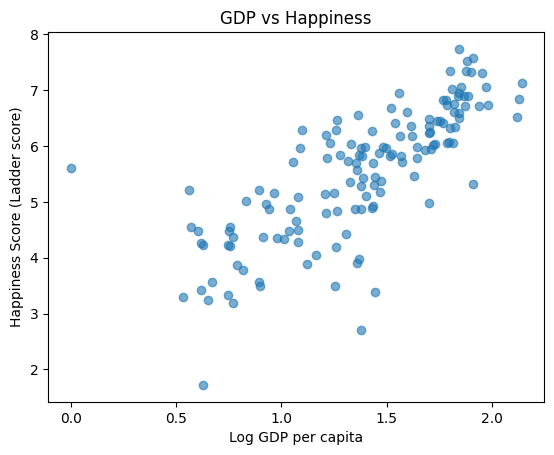

In [ ]:
avg_happiness = df.groupby('Country name')[['Log GDP per capita', 'Ladder score']].mean()
plt.scatter(avg_happiness['Log GDP per capita'], avg_happiness['Ladder score'],alpha=0.6)
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score (Ladder score)')
plt.title('GDP vs Happiness')
plt.show()

In [ ]:
df.groupby('Regional indicator')['Healthy life expectancy'].mean().idxmax()

'Western Europe'